In [4]:
# Import necesscary packages.
import os

import earthpy as et
import pandas as pd
from matplotlib.dates import DateFormatter
import matplotlib.pyplot as plt
from glob import glob
import numpy as np
from matplotlib.ticker import AutoMinorLocator
from matplotlib.ticker import AutoMinorLocator, FormatStrFormatter
import geopandas as gpd
import folium
import seaborn as sns
from scipy.stats import linregress
from datetime import datetime, timedelta
from matplotlib.lines import Line2D
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from scipy import stats
from scipy.stats import linregress
from folium.plugins import HeatMap
from sklearn.preprocessing import MinMaxScaler
from folium import Marker
from sklearn.linear_model import LinearRegression
import calendar
import re
from scipy.optimize import curve_fit

In [5]:
# Set working directory.
temp_path = os.path.join(
    et.io.HOME,
    'earth-analytics',
    'data')
# Check if the path exists, if not create it.
if os.path.exists(temp_path):
    os.chdir(temp_path)
else:
    print('This path does not exist')
os.getcwd()

'/Users/rebeccamchugh/earth-analytics/data'

In [6]:
# Import csv files for temperature data.
temp_dir = glob(os.path.join('temperature-data-final-2023', '*'))
temp_dir

['temperature-data-final-2023/variables.csv',
 'temperature-data-final-2023/sensor_gps - Sheet1.csv',
 'temperature-data-final-2023/nightday_csv.csv']

In [15]:
nightday_df = pd.read_csv('temperature-data-final-2023/nightday_csv.csv')
nightday_df['date_time'] = pd.to_datetime(nightday_df['date_time'])

nightday_df

,date_time,temp_fahrenheit,Time of Day,sensor_number
0,2023-05-17 00:00:00,65.51,Night,sensor_001
1,2023-05-17 00:05:00,65.28,Night,sensor_001
2,2023-05-17 00:10:00,65.12,Night,sensor_001
3,2023-05-17 00:15:00,64.89,Night,sensor_001
4,2023-05-17 00:20:00,64.81,Night,sensor_001
...,...,...,...,...
795328,2023-07-27 11:15:00,88.20,Day,sensor_048b
795329,2023-07-27 11:20:00,88.90,Day,sensor_048b
795330,2023-07-27 11:25:00,88.90,Day,sensor_048b
795331,2023-07-27 11:30:00,88.30,Day,sensor_048b


In [16]:
# Calculate the daily mean temperature for each day
nightday_df['daily_mean_temp'] = nightday_df.groupby(['Time of Day', 'sensor_number', nightday_df['date_time'].dt.date])['temp_fahrenheit'].transform('mean')

# Create a new column with just the month
nightday_df['month'] = nightday_df['date_time'].dt.month

# Create a new column with just the day
nightday_df['day'] = nightday_df['date_time'].dt.day

# Group the data by month, Time of Day, and sensor number
grouped = nightday_df.groupby(['month', 'day', 'Time of Day', 'sensor_number'])

# Calculate the average of daily mean temperatures for each month, day, and Time of Day
monthly_avg_mean_temps = grouped['daily_mean_temp'].mean().reset_index()

# Rename the 'daily_mean_temp' column to 'monthly_avg_mean_temp'
monthly_avg_mean_temps.rename(columns={'daily_mean_temp': 'monthly_avg_mean_temp'}, inplace=True)

# Merge the monthly average temperatures back into the original DataFrame
nightday_df = nightday_df.merge(monthly_avg_mean_temps, on=['month', 'day', 'Time of Day', 'sensor_number'], how='left')

# Drop the 'temp_fahrenheit' column
nightday_df.drop(columns=['temp_fahrenheit', 'day'], inplace=True)

# Check the resulting DataFrame
nightday_df

# Assuming you have a DataFrame named 'nightday_df' and you want to export it to a CSV file named 'output.csv'
nightday_df.to_csv('output.csv', index=False)



In [17]:
nightday_df

,date_time,Time of Day,sensor_number,daily_mean_temp,month,monthly_avg_mean_temp
0,2023-05-17 00:00:00,Night,sensor_001,59.895729,5,59.895729
1,2023-05-17 00:05:00,Night,sensor_001,59.895729,5,59.895729
2,2023-05-17 00:10:00,Night,sensor_001,59.895729,5,59.895729
3,2023-05-17 00:15:00,Night,sensor_001,59.895729,5,59.895729
4,2023-05-17 00:20:00,Night,sensor_001,59.895729,5,59.895729
...,...,...,...,...,...,...
795328,2023-07-27 11:15:00,Day,sensor_048b,80.083824,7,80.083824
795329,2023-07-27 11:20:00,Day,sensor_048b,80.083824,7,80.083824
795330,2023-07-27 11:25:00,Day,sensor_048b,80.083824,7,80.083824
795331,2023-07-27 11:30:00,Day,sensor_048b,80.083824,7,80.083824


In [8]:
# Calculate the daily mean temperature for each day
nightday_df['daily_mean_temp'] = nightday_df.groupby(['Time of Day', 'sensor_number', nightday_df['date_time'].dt.date])['temp_fahrenheit'].transform('mean')

# Create a new column with just the month
nightday_df['month'] = nightday_df['date_time'].dt.month

# Group the data by month, Time of Day, and sensor number
grouped = nightday_df.groupby(['month', 'Time of Day', 'sensor_number'])

# Calculate the average of daily mean temperatures for each month, by Time of Day
monthly_avg_mean_temps = grouped['daily_mean_temp'].mean()

# Convert the result to a DataFrame
monthly_avg_mean_temps = monthly_avg_mean_temps.reset_index()

# Rename the 'daily_mean_temp' column to 'monthly_avg_mean_temp'
monthly_avg_mean_temps.rename(columns={'daily_mean_temp': 'monthly_avg_mean_temp'}, inplace=True)

# Check the resulting DataFrame
monthly_avg_mean_temps


,month,Time of Day,sensor_number,monthly_avg_mean_temp
0,5,Day,sensor_001,65.060851
1,5,Day,sensor_002,64.694000
2,5,Day,sensor_003,65.299170
3,5,Day,sensor_004,65.188170
4,5,Day,sensor_005,63.711844
...,...,...,...,...
237,7,Night,sensor_045b,63.690382
238,7,Night,sensor_045c,65.307516
239,7,Night,sensor_047a,64.875301
240,7,Night,sensor_048a,64.048920


In [6]:
sensor_mapping = {
    'sensor_001': '001',
    'sensor_002': '002',
    'sensor_003': '003',
    'sensor_004': '004',
    'sensor_005': '005',
    'sensor_006': '006',
    'sensor_007': '007',
    'sensor_008': '008',
    'sensor_009': '009',
    'sensor_010': '010',
    'sensor_011': '011',
    'sensor_012': '012',
    'sensor_013': '013',
    'sensor_014': '014',
    'sensor_015': '015',
    'sensor_016': '016',
    'sensor_017': '017',
    'sensor_018': '018',
    'sensor_019': '019',
    'sensor_020': '020',
    'sensor_021': '021',
    'sensor_022': '022',
    'sensor_023': '023',
    'sensor_024': '024',
    'sensor_025': '025',
    'sensor_026': '026',
    'sensor_027': '027',
    'sensor_028': '028',
    'sensor_029': '029',
    'sensor_030': '030',
    'sensor_031': '031',
    'sensor_032': '032',
    'sensor_033': '033',
    'sensor_034': '034',
    'sensor_035': '035',
    'sensor_036': '036',
    'sensor_037': '037',
    'sensor_038': '038',
    'sensor_039': '039',
    'sensor_040': '040',
    'sensor_041': '041',
    'sensor_042': '042',
    'sensor_043': '043',
    'sensor_044a': '044a',
    'sensor_044b': '044b',
    'sensor_045a': '045a',
    'sensor_045b': '045b',
    'sensor_046a' : '046a',
    'sensor_046b': '046b',
    'sensor_047a': '047a',
    'sensor_047b': '047b',
    'sensor_045c': '045c',
    'sensor_048a': '048a',
    'sensor_048b': '048b',
    'sensor_044c': '044c',
    'sensor_049a': '049a', 
    'sensor_049b': '049b'
}


In [45]:
# Import other variables 
variables = pd.read_csv('temperature-data-final-2023/variables.csv')
# Convert specific columns to float64
columns_to_convert = ['elevation_terrain_m',
                      'slope_terrain_degree',
                      'aspect_terrain_degree',
                      'cc-densiometer-average']
# Define a dictionary to replace specific non-numeric values with NaN
replace_dict = {'#DIV/0!': float('nan')}  # Add more values if needed

# Remove commas and then convert to float64, replacing specific values with NaN
for column in columns_to_convert:
    variables[column] = pd.to_numeric(variables[column].replace(',', '', regex=True).replace(replace_dict))

variables.info() # Check the data types after conversion


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 48 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ID                             59 non-null     object 
 1   Name                           58 non-null     object 
 2   avg_grass                      53 non-null     float64
 3   avg_forb                       53 non-null     float64
 4   avg_shrub                      53 non-null     float64
 5   avg_bare-ground                53 non-null     float64
 6   avg_a-c-r                      53 non-null     float64
 7   avg_water                      53 non-null     float64
 8   avg_XL-grass                   53 non-null     float64
 9   avg_XL-forb                    53 non-null     float64
 10  avg_XL-shrub                   53 non-null     float64
 11  avg_green                      53 non-null     float64
 12  avg_impervious                 53 non-null     float

In [46]:
# Merge data
# Add "sensor_" prefix to the ID column in variables DataFrame
variables['ID'] = 'sensor_' + variables['ID'].astype(str)

#Merge the two DataFrames on 'sensor_number' and 'ID'
merged_data = pd.merge(monthly_avg_mean_temps, variables, left_on='sensor_number', right_on='ID')

# # Print the merged DataFrame
merged_data

,month,Time of Day,sensor_number,monthly_avg_mean_temp,ID,Name,avg_grass,avg_forb,avg_shrub,avg_bare-ground,...,Impervious_percent_cover_5m,Impervious_percent_cover_1m,Canopy_percent_cover_100m,Canopy_percent_cover_50m,Canopy_percent_cover_30m,Canopy_percent_cover_10m,Canopy_percent_cover_5m,Canopy_percent_cover_1m,zone,assoc_tree
0,5,Day,sensor_001,65.060851,sensor_001,Senior Living Facility,25.285877,13.076931,0.000206,16.938618,...,0.001,0.0,0.277,0.348,0.305,0.4,0.502,0.612,Residental high 1,NaN
1,5,Night,sensor_001,56.006604,sensor_001,Senior Living Facility,25.285877,13.076931,0.000206,16.938618,...,0.001,0.0,0.277,0.348,0.305,0.4,0.502,0.612,Residental high 1,NaN
2,6,Day,sensor_001,66.897813,sensor_001,Senior Living Facility,25.285877,13.076931,0.000206,16.938618,...,0.001,0.0,0.277,0.348,0.305,0.4,0.502,0.612,Residental high 1,NaN
3,6,Night,sensor_001,58.976062,sensor_001,Senior Living Facility,25.285877,13.076931,0.000206,16.938618,...,0.001,0.0,0.277,0.348,0.305,0.4,0.502,0.612,Residental high 1,NaN
4,7,Day,sensor_001,76.631000,sensor_001,Senior Living Facility,25.285877,13.076931,0.000206,16.938618,...,0.001,0.0,0.277,0.348,0.305,0.4,0.502,0.612,Residental high 1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,7,Night,sensor_047a,64.875301,sensor_047a,Valmont disc park irrigated,49.121001,26.594685,0.000110,11.646359,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Public,NaN
238,7,Day,sensor_048a,79.627915,sensor_048a,Sports field irrigated - D,21.832849,18.875685,0.000000,4.502907,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Public,NaN
239,7,Night,sensor_048a,64.048920,sensor_048a,Sports field irrigated - D,21.832849,18.875685,0.000000,4.502907,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Public,NaN
240,7,Day,sensor_048b,77.110492,sensor_048b,Sports field un-irrigated - E,16.944143,23.076218,0.000037,22.090580,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Public,NaN


In [47]:
import pandas as pd

# Assuming 'df' is your DataFrame
# List the columns for which you want to drop rows with missing values
columns_to_check = ['Impervious_percent_cover_50m', 'Canopy_percent_cover_50m']  # Replace with your actual column names

# Drop rows with missing values for the specified columns
merged_data.dropna(subset=columns_to_check, inplace=True)




Month 5, Day Data Shape: (32, 52), Night Data Shape: (32, 52)
Month 5, Day Slope: -0.8481472988614016, Night Slope: -1.1895573156871264
Month 6, Day Data Shape: (32, 52), Night Data Shape: (32, 52)
Month 6, Day Slope: -2.5220582298782506, Night Slope: -2.8227493885970816
Month 7, Day Data Shape: (32, 52), Night Data Shape: (32, 52)
Month 7, Day Slope: -2.977608675110567, Night Slope: -0.42100204199266467


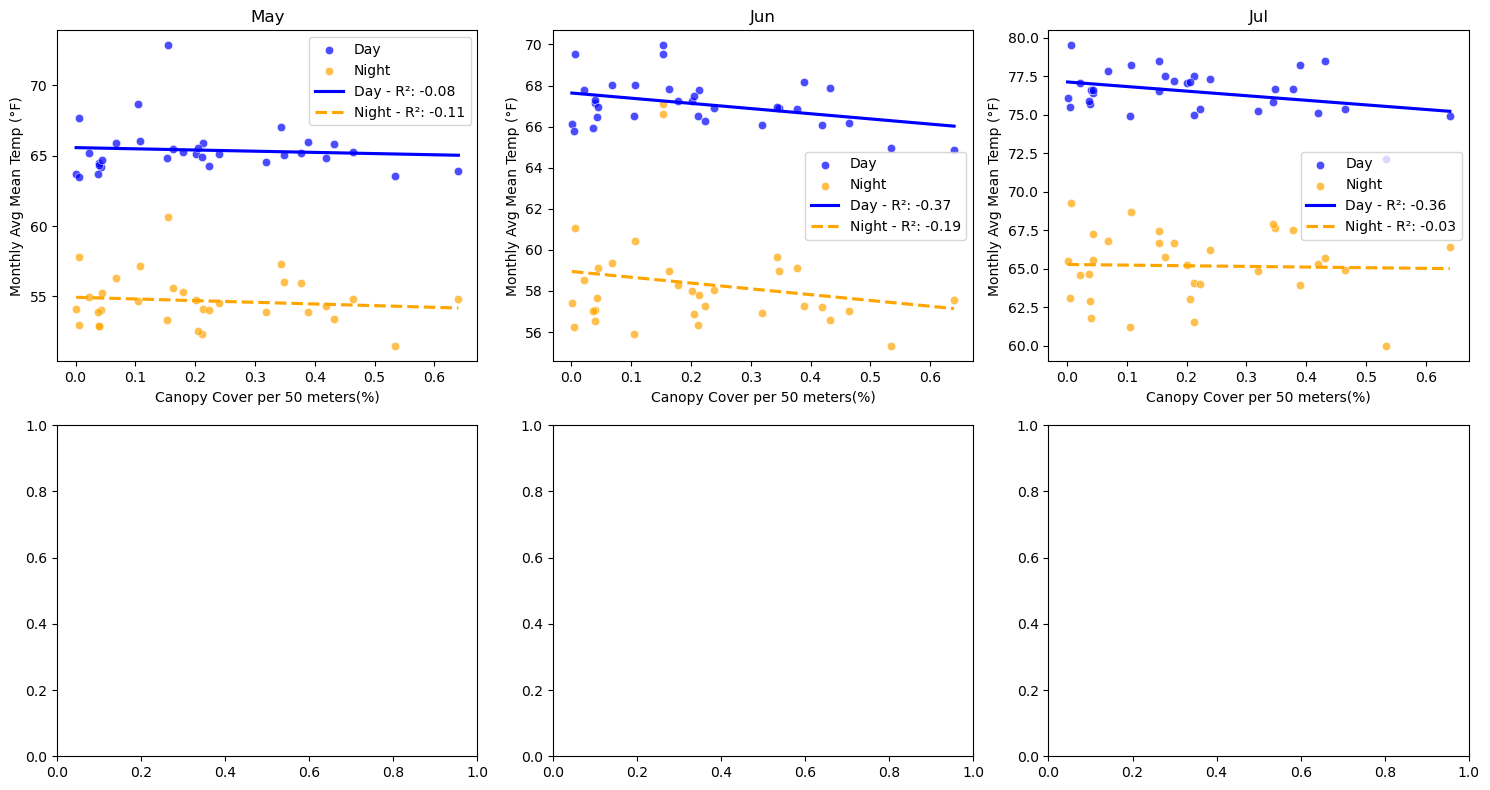

In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import calendar
from scipy.stats import linregress

# Assuming you have a DataFrame called merged_data
# Replace 'merged_data' with your actual DataFrame name

# Create separate DataFrames for day and night observations
day_data = merged_data[merged_data['Time of Day'] == 'Day']
night_data = merged_data[merged_data['Time of Day'] == 'Night']

# Create subplots to display scatter plots by month
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))

# Loop through each month (assuming months are from 5 to 10)
for month in range(5, 11):  # Months 5 to 10
    row = (month - 5) // 3  # Adjust the row index
    col = (month - 5) % 3   # Adjust the column index

    # Subset day and night data for the current month
    day_month_data = day_data[day_data['month'] == month]
    night_month_data = night_data[night_data['month'] == month]

    if not day_month_data.empty and not night_month_data.empty:
        print(f"Month {month}, Day Data Shape: {day_month_data.shape}, Night Data Shape: {night_month_data.shape}")

        # Create a scatter plot of Impervious_percent_cover_50m vs. monthly_avg_mean_temp for day observations
        sns.scatterplot(data=day_month_data, x='Canopy_percent_cover_50m', y='monthly_avg_mean_temp',
                        ax=axes[row, col], color='blue', label='Day', alpha=0.7)

        # Create a scatter plot of Impervious_percent_cover_50m vs. monthly_avg_mean_temp for night observations
        sns.scatterplot(data=night_month_data, x='Canopy_percent_cover_50m', y='monthly_avg_mean_temp',
                        ax=axes[row, col], color='orange', label='Night', alpha=0.7)

        # Calculate and plot linear regression lines using Seaborn's regplot
        day_slope, day_intercept, day_r_value, _, _ = linregress(day_month_data['Canopy_percent_cover_50m'], day_month_data['monthly_avg_mean_temp'])
        night_slope, night_intercept, night_r_value, _, _ = linregress(night_month_data['Canopy_percent_cover_50m'], night_month_data['monthly_avg_mean_temp'])

        print(f"Month {month}, Day Slope: {day_slope}, Night Slope: {night_slope}")

        sns.regplot(x='Canopy_percent_cover_50m', y='monthly_avg_mean_temp', data=day_month_data, ci=None, scatter=False,
                    ax=axes[row, col], label=f'Day - R²: {day_r_value:.2f}', line_kws={'linestyle': '-', 'color': 'blue'})

        sns.regplot(x='Canopy_percent_cover_50m', y='monthly_avg_mean_temp', data=night_month_data, ci=None, scatter=False,
                    ax=axes[row, col], label=f'Night - R²: {night_r_value:.2f}', line_kws={'linestyle': '--', 'color': 'orange'})

        axes[row, col].set_title(f'{calendar.month_abbr[month]}')
        axes[row, col].set_xlabel('Canopy Cover per 50 meters(%)')
        axes[row, col].set_ylabel('Monthly Avg Mean Temp (°F)')
        axes[row, col].legend()

# Adjust subplot layout
plt.tight_layout()
plt.show()


Month 5, Day Data Shape: (32, 52), Night Data Shape: (32, 52)
Month 5, Day Slope: -0.8481472988614016, Night Slope: -1.1895573156871264
Month 6, Day Data Shape: (32, 52), Night Data Shape: (32, 52)
Month 6, Day Slope: -2.5220582298782506, Night Slope: -2.8227493885970816
Month 7, Day Data Shape: (32, 52), Night Data Shape: (32, 52)
Month 7, Day Slope: -2.977608675110567, Night Slope: -0.42100204199266467


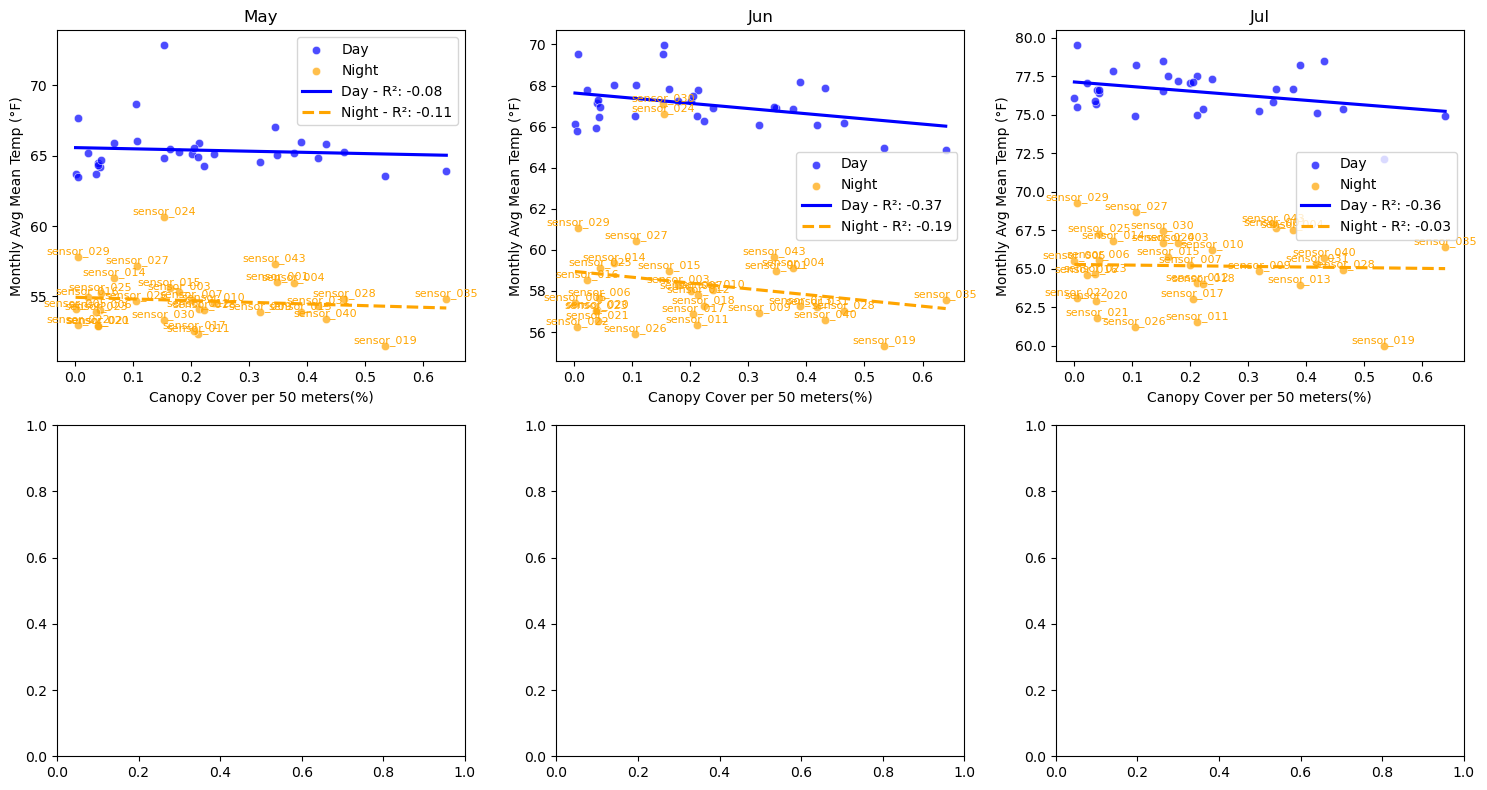

In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import calendar
from scipy.stats import linregress

# Assuming you have a DataFrame called merged_data
# Replace 'merged_data' with your actual DataFrame name

# Create separate DataFrames for day and night observations
day_data = merged_data[merged_data['Time of Day'] == 'Day']
night_data = merged_data[merged_data['Time of Day'] == 'Night']

# Create subplots to display scatter plots by month
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))

# Loop through each month (assuming months are from 5 to 10)
for month in range(5, 11):  # Months 5 to 10
    row = (month - 5) // 3  # Adjust the row index
    col = (month - 5) % 3   # Adjust the column index

    # Subset day and night data for the current month
    day_month_data = day_data[day_data['month'] == month]
    night_month_data = night_data[night_data['month'] == month]

    if not day_month_data.empty and not night_month_data.empty:
        print(f"Month {month}, Day Data Shape: {day_month_data.shape}, Night Data Shape: {night_month_data.shape}")

        # Create a scatter plot of Canopy_percent_cover_50m vs. monthly_avg_mean_temp for day observations
        sns.scatterplot(data=day_month_data, x='Canopy_percent_cover_50m', y='monthly_avg_mean_temp',
                        ax=axes[row, col], color='blue', label='Day', alpha=0.7)

        # Create a scatter plot of Canopy_percent_cover_50m vs. monthly_avg_mean_temp for night observations
        sns.scatterplot(data=night_month_data, x='Canopy_percent_cover_50m', y='monthly_avg_mean_temp',
                        ax=axes[row, col], color='orange', label='Night', alpha=0.7)

        # Add sensor_number labels to nighttime data points
        for _, row_data in night_month_data.iterrows():
            axes[row, col].text(row_data['Canopy_percent_cover_50m'], row_data['monthly_avg_mean_temp'], str(row_data['sensor_number']), fontsize=8, ha='center', va='bottom', color='orange')

        # Calculate and plot linear regression lines using Seaborn's regplot
        day_slope, day_intercept, day_r_value, _, _ = linregress(day_month_data['Canopy_percent_cover_50m'], day_month_data['monthly_avg_mean_temp'])
        night_slope, night_intercept, night_r_value, _, _ = linregress(night_month_data['Canopy_percent_cover_50m'], night_month_data['monthly_avg_mean_temp'])

        print(f"Month {month}, Day Slope: {day_slope}, Night Slope: {night_slope}")

        sns.regplot(x='Canopy_percent_cover_50m', y='monthly_avg_mean_temp', data=day_month_data, ci=None, scatter=False,
                    ax=axes[row, col], label=f'Day - R²: {day_r_value:.2f}', line_kws={'linestyle': '-', 'color': 'blue'})

        sns.regplot(x='Canopy_percent_cover_50m', y='monthly_avg_mean_temp', data=night_month_data, ci=None, scatter=False,
                    ax=axes[row, col], label=f'Night - R²: {night_r_value:.2f}', line_kws={'linestyle': '--', 'color': 'orange'})

        axes[row, col].set_title(f'{calendar.month_abbr[month]}')
        axes[row, col].set_xlabel('Canopy Cover per 50 meters(%)')
        axes[row, col].set_ylabel('Monthly Avg Mean Temp (°F)')
        axes[row, col].legend()

# Adjust subplot layout
plt.tight_layout()
plt.show()


Month 5, Day Data Shape: (30, 52), Night Data Shape: (30, 52)
Month 5, Day Slope: -0.397971264757034, Night Slope: -0.8925367722341221
Month 6, Day Data Shape: (30, 52), Night Data Shape: (30, 52)
Month 6, Day Slope: -2.1892307124880426, Night Slope: -1.7111756839049892
Month 7, Day Data Shape: (30, 52), Night Data Shape: (30, 52)
Month 7, Day Slope: -2.8643493729557847, Night Slope: -0.17699052059940804


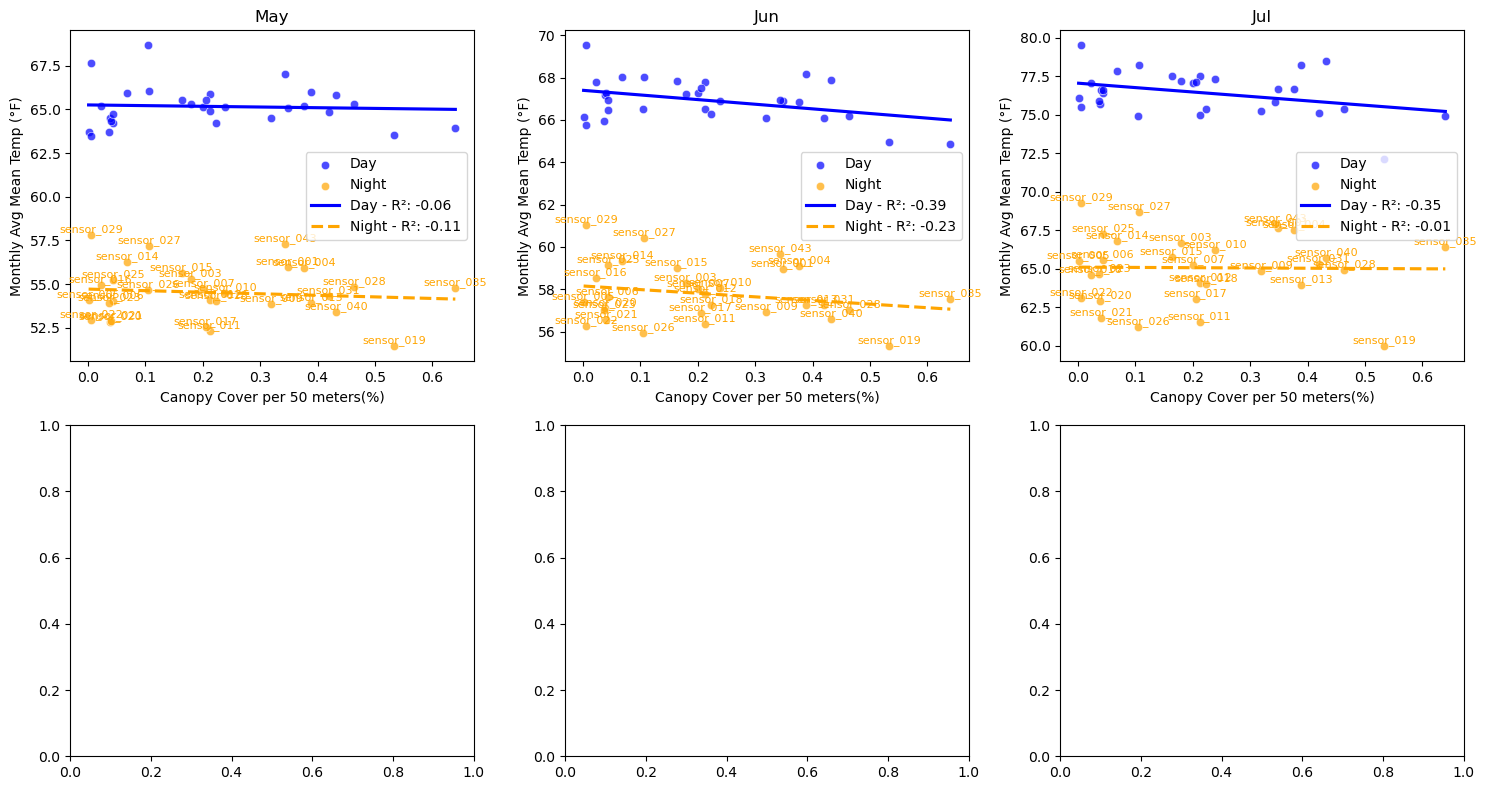

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import calendar
from scipy.stats import linregress

# Assuming you have a DataFrame called merged_data
# Replace 'merged_data' with your actual DataFrame name

# Define a list of sensor numbers to exclude
exclude_sensors = ['sensor_030', 'sensor_024']  # Replace with the sensor numbers you want to exclude

# Create separate DataFrames for day and night observations
day_data = merged_data[(merged_data['Time of Day'] == 'Day') & (~merged_data['sensor_number'].isin(exclude_sensors))]
night_data = merged_data[(merged_data['Time of Day'] == 'Night') & (~merged_data['sensor_number'].isin(exclude_sensors))]

# Create subplots to display scatter plots by month
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))

# Loop through each month (assuming months are from 5 to 10)
for month in range(5, 11):  # Months 5 to 10
    row = (month - 5) // 3  # Adjust the row index
    col = (month - 5) % 3   # Adjust the column index

    # Subset day and night data for the current month
    day_month_data = day_data[day_data['month'] == month]
    night_month_data = night_data[night_data['month'] == month]

    if not day_month_data.empty and not night_month_data.empty:
        print(f"Month {month}, Day Data Shape: {day_month_data.shape}, Night Data Shape: {night_month_data.shape}")

        # Create a scatter plot of Canopy_percent_cover_50m vs. monthly_avg_mean_temp for day observations
        sns.scatterplot(data=day_month_data, x='Canopy_percent_cover_50m', y='monthly_avg_mean_temp',
                        ax=axes[row, col], color='blue', label='Day', alpha=0.7)

        # Create a scatter plot of Canopy_percent_cover_50m vs. monthly_avg_mean_temp for night observations
        sns.scatterplot(data=night_month_data, x='Canopy_percent_cover_50m', y='monthly_avg_mean_temp',
                        ax=axes[row, col], color='orange', label='Night', alpha=0.7)

        # Add sensor_number labels to nighttime data points
        for _, row_data in night_month_data.iterrows():
            axes[row, col].text(row_data['Canopy_percent_cover_50m'], row_data['monthly_avg_mean_temp'], str(row_data['sensor_number']), fontsize=8, ha='center', va='bottom', color='orange')

        # Calculate and plot linear regression lines using Seaborn's regplot
        day_slope, day_intercept, day_r_value, _, _ = linregress(day_month_data['Canopy_percent_cover_50m'], day_month_data['monthly_avg_mean_temp'])
        night_slope, night_intercept, night_r_value, _, _ = linregress(night_month_data['Canopy_percent_cover_50m'], night_month_data['monthly_avg_mean_temp'])

        print(f"Month {month}, Day Slope: {day_slope}, Night Slope: {night_slope}")

        sns.regplot(x='Canopy_percent_cover_50m', y='monthly_avg_mean_temp', data=day_month_data, ci=None, scatter=False,
                    ax=axes[row, col], label=f'Day - R²: {day_r_value:.2f}', line_kws={'linestyle': '-', 'color': 'blue'})

        sns.regplot(x='Canopy_percent_cover_50m', y='monthly_avg_mean_temp', data=night_month_data, ci=None, scatter=False,
                    ax=axes[row, col], label=f'Night - R²: {night_r_value:.2f}', line_kws={'linestyle': '--', 'color': 'orange'})

        axes[row, col].set_title(f'{calendar.month_abbr[month]}')
        axes[row, col].set_xlabel('Canopy Cover per 50 meters(%)')
        axes[row, col].set_ylabel('Monthly Avg Mean Temp (°F)')
        axes[row, col].legend()

# Adjust subplot layout
plt.tight_layout()
plt.show()


Month 5, Day Data Shape: (32, 52), Night Data Shape: (32, 52)
Month 5, Day R² (Exponential): 0.04, Night R² (Exponential): 0.01
Month 6, Day Data Shape: (32, 52), Night Data Shape: (32, 52)
Month 6, Day R² (Exponential): 0.02, Night R² (Exponential): 0.00
Month 7, Day Data Shape: (32, 52), Night Data Shape: (32, 52)
Month 7, Day R² (Exponential): 0.13, Night R² (Exponential): 0.00


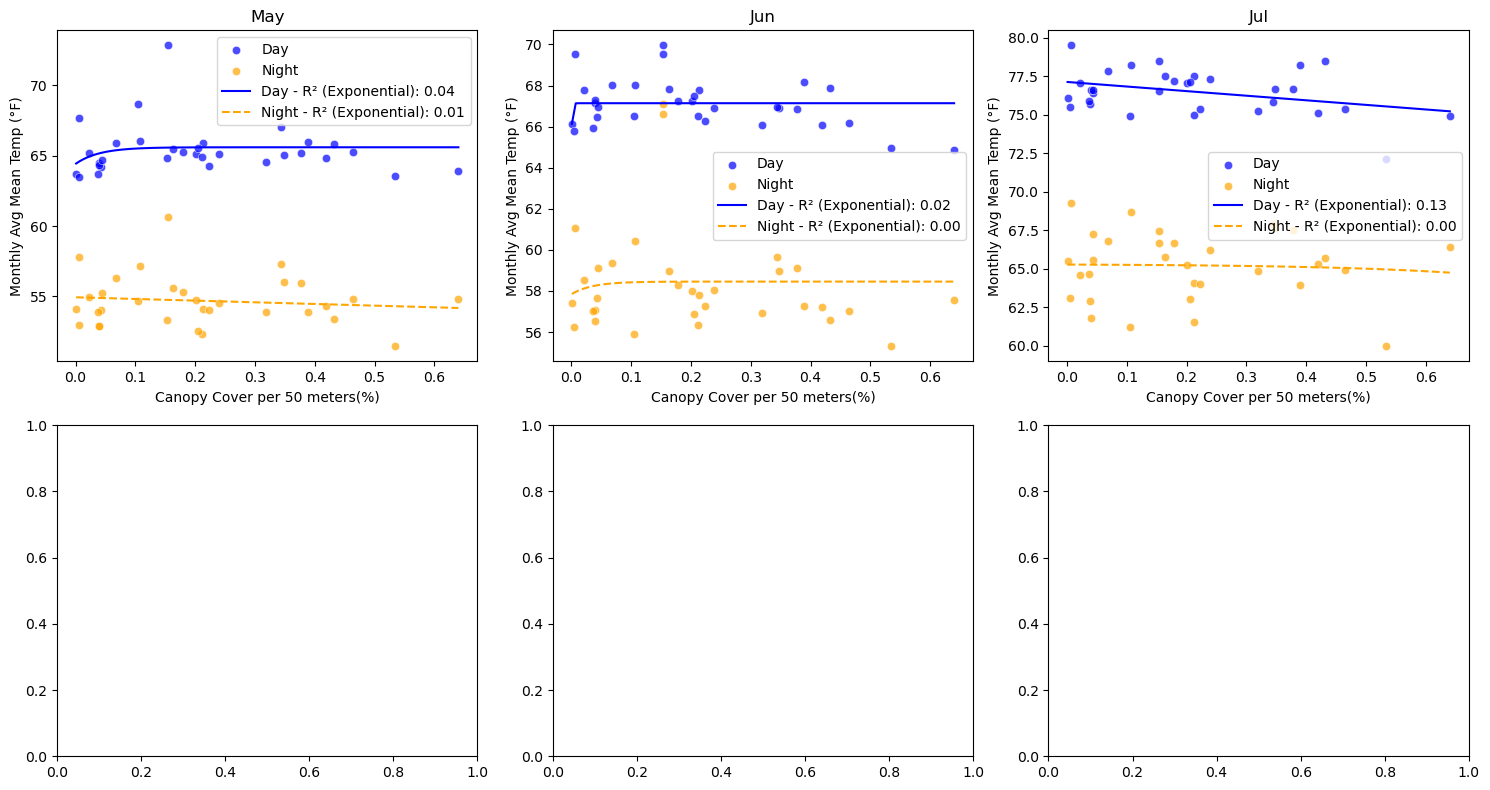

In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import calendar
import numpy as np
from scipy.stats import linregress
from scipy.optimize import curve_fit

# Assuming you have a DataFrame called merged_data
# Replace 'merged_data' with your actual DataFrame name

# Define a list of sensor numbers to exclude
exclude_sensors = []  # Replace with the sensor numbers you want to exclude

# Create separate DataFrames for day and night observations
day_data = merged_data[(merged_data['Time of Day'] == 'Day') & (~merged_data['sensor_number'].isin(exclude_sensors))]
night_data = merged_data[(merged_data['Time of Day'] == 'Night') & (~merged_data['sensor_number'].isin(exclude_sensors))]

# Create subplots to display scatter plots by month
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))

# Define an exponential function to fit
def exponential_func(x, a, b, c):
    return a * np.exp(b * x) + c

# Loop through each month (assuming months are from 5 to 10)
for month in range(5, 11):  # Months 5 to 10
    row = (month - 5) // 3  # Adjust the row index
    col = (month - 5) % 3   # Adjust the column index

    # Subset day and night data for the current month
    day_month_data = day_data[day_data['month'] == month]
    night_month_data = night_data[night_data['month'] == month]

    if not day_month_data.empty and not night_month_data.empty:
        print(f"Month {month}, Day Data Shape: {day_month_data.shape}, Night Data Shape: {night_month_data.shape}")

        # Create a scatter plot of Canopy_percent_cover_50m vs. monthly_avg_mean_temp for day observations
        sns.scatterplot(data=day_month_data, x='Canopy_percent_cover_50m', y='monthly_avg_mean_temp',
                        ax=axes[row, col], color='blue', label='Day', alpha=0.7)

        # Create a scatter plot of Canopy_percent_cover_50m vs. monthly_avg_mean_temp for night observations
        sns.scatterplot(data=night_month_data, x='Canopy_percent_cover_50m', y='monthly_avg_mean_temp',
                        ax=axes[row, col], color='orange', label='Night', alpha=0.7)

        # Fit an exponential curve to the data and calculate R-squared values
        def fit_exponential(x, y):
            popt, _ = curve_fit(exponential_func, x, y)
            residuals = y - exponential_func(x, *popt)
            ss_res = np.sum(residuals**2)
            ss_tot = np.sum((y - np.mean(y))**2)
            r_squared = 1 - (ss_res / ss_tot)
            return popt, r_squared

        day_popt, day_r_squared = fit_exponential(day_month_data['Canopy_percent_cover_50m'], day_month_data['monthly_avg_mean_temp'])
        night_popt, night_r_squared = fit_exponential(night_month_data['Canopy_percent_cover_50m'], night_month_data['monthly_avg_mean_temp'])

        print(f"Month {month}, Day R² (Exponential): {day_r_squared:.2f}, Night R² (Exponential): {night_r_squared:.2f}")

        # Plot the fitted exponential curves
        x_range = np.linspace(day_month_data['Canopy_percent_cover_50m'].min(), day_month_data['Canopy_percent_cover_50m'].max(), 100)
        day_curve = exponential_func(x_range, *day_popt)
        night_curve = exponential_func(x_range, *night_popt)

        axes[row, col].plot(x_range, day_curve, linestyle='-', color='blue', label=f'Day - R² (Exponential): {day_r_squared:.2f}')
        axes[row, col].plot(x_range, night_curve, linestyle='--', color='orange', label=f'Night - R² (Exponential): {night_r_squared:.2f}')

        axes[row, col].set_title(f'{calendar.month_abbr[month]}')
        axes[row, col].set_xlabel('Canopy Cover per 50 meters(%)')
        axes[row, col].set_ylabel('Monthly Avg Mean Temp (°F)')
        axes[row, col].legend()

# Adjust subplot layout
plt.tight_layout()
plt.show()


In [60]:
#import matplotlib
#matplotlib.use('Agg') 
# Custom labels for column names
column_labels = {
    'avg_grass': 'Grass',
    'avg_forb': 'Forb',
    'avg_shrub': 'Shrub',
    'avg_a-c-r': 'Asphalt, concrete, or rock',
    'avg_bare-ground': 'Bare Ground',
    'avg_water': 'Water',
    'avg_XL-grass': 'Grass over 0.5 meters',
    'avg_XL-forb': 'Forbs over 0.5 meters',
    'avg_XL-shrub': 'Shrubs 0.5 meters',
    'avg_green' : 'Grass, forbs, and shrubs cover'
}

# Plot veg. data 
def plot_temps_by_cover(merged_data, column_name, month):
    plt.figure(figsize=(12, 6))
    sns.set_style('whitegrid')
    
    # Filter data for the specific month
    month_data = merged_data[merged_data['month'] == month]
    
    # Combine 'Time of Day' and 'sensor_number' to create a unique hue identifier
    month_data['hue_identifier'] = month_data['Time of Day'] + ' - ' + month_data['sensor_number'].astype(str)
    
    # Define colors for day and night points
    day_color = 'blue'
    night_color = 'orange'
    
    # Plot the data using Seaborn
    sns.scatterplot(data=month_data, x=column_name, y='monthly_avg_mean_temp', hue='Time of Day',
                    palette={'Day': day_color, 'Night': night_color})
    
    # Calculate and plot linear regression lines using Seaborn's regplot
    day_data = month_data[month_data['Time of Day'] == 'Day']
    night_data = month_data[month_data['Time of Day'] == 'Night']
    
    day_slope, day_intercept, day_r_value, _, _ = linregress(day_data[column_name], day_data['monthly_avg_mean_temp'])
    night_slope, night_intercept, night_r_value, _, _ = linregress(night_data[column_name], night_data['monthly_avg_mean_temp'])
    
    sns.regplot(data=day_data, x=column_name, y='monthly_avg_mean_temp', ci=None, scatter=False, label=f'Day - R²: {day_r_value:.2f}', line_kws={'linestyle': '-', 'color': day_color})
    sns.regplot(data=night_data, x=column_name, y='monthly_avg_mean_temp', ci=None, scatter=False, label=f'Night - R²: {night_r_value:.2f}', line_kws={'linestyle': '--', 'color': night_color})
    
    # Get the custom label for the column or use the column name
    cover_type_label = column_labels.get(column_name, column_name.replace('%_avg_cover_', '').replace('_', ' ').capitalize())
    
    plt.xlabel(f'Percentage Average {cover_type_label}')
    plt.ylabel('Daily Mean, Monthly Average Temperature (°F)')
    plt.title(f'Monthly Temperatures vs. Percentage Average {cover_type_label} in 50-meters - {calendar.month_name[month]} 2023')
    
    # Add linear regression equations in the legend
    legend = plt.legend(title='', loc='upper left')
    legend.texts[0].set_text(f'Day y = {day_slope:.2f}x + {day_intercept:.2f}')
    legend.texts[1].set_text(f'Night y = {night_slope:.2f}x + {night_intercept:.2f}')
    
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.xlim(month_data[column_name].min() - 5, month_data[column_name].max() + 5)
    plt.xlim(0, 100)  # Set x-axis limits to 0-100
    plt.ylim(50, 100)  # Set y-axis limits to 50-110
    plt.show()

# List of months for which you want to create plots
months_to_plot = [5, 6, 7]  # Adjust this list as needed

# List of column names to plot
columns_to_plot = [
    'avg_grass',
    'avg_forb',
    'avg_shrub',
    'avg_a-c-r',
    'avg_bare-ground',
    'avg_water',
    'avg_XL-grass',
    'avg_XL-forb',
    'avg_XL-shrub',
    'avg_green'
]

# ... (previous code)

for column_name in columns_to_plot:
    for month in months_to_plot:
        plot_temps_by_cover(merged_data, column_name, month)
        plt.savefig(f'./{column_name}_{calendar.month_abbr[month]}.png', bbox_inches='tight')  # Save in the current directory
        plt.close()  # Close the current figure to avoid overlap in subsequent loops


/var/folders/97/7qgdlml54q39bd4jhmt7v67c0000gn/T/ipykernel_33618/120672345.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month_data['hue_identifier'] = month_data['Time of Day'] + ' - ' + month_data['sensor_number'].astype(str)
/var/folders/97/7qgdlml54q39bd4jhmt7v67c0000gn/T/ipykernel_33618/120672345.py:63: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
/var/folders/97/7qgdlml54q39bd4jhmt7v67c0000gn/T/ipykernel_33618/120672345.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid

/var/folders/97/7qgdlml54q39bd4jhmt7v67c0000gn/T/ipykernel_33618/120672345.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month_data['hue_identifier'] = month_data['Time of Day'] + ' - ' + month_data['sensor_number'].astype(str)
/var/folders/97/7qgdlml54q39bd4jhmt7v67c0000gn/T/ipykernel_33618/120672345.py:63: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
/var/folders/97/7qgdlml54q39bd4jhmt7v67c0000gn/T/ipykernel_33618/120672345.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid

/var/folders/97/7qgdlml54q39bd4jhmt7v67c0000gn/T/ipykernel_33618/120672345.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month_data['hue_identifier'] = month_data['Time of Day'] + ' - ' + month_data['sensor_number'].astype(str)
/var/folders/97/7qgdlml54q39bd4jhmt7v67c0000gn/T/ipykernel_33618/120672345.py:63: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
/var/folders/97/7qgdlml54q39bd4jhmt7v67c0000gn/T/ipykernel_33618/120672345.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid